In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오고 점검하기

In [3]:
#압축풀기
import zipfile

local_zip = '/content/drive/MyDrive/데이터저장/대회/mnist.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
df = pd.read_csv('/content/train.csv')
df

,index,label,px1,px2,px3,px4,px5,px6,px7,px8,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(60000, 786)

In [6]:
len(df.columns)

786

In [7]:
set(df['label'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
df.isnull().sum()

index    0
label    0
px1      0
px2      0
px3      0
        ..
px780    0
px781    0
px782    0
px783    0
px784    0
Length: 786, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, index to px784
dtypes: int64(786)
memory usage: 359.8 MB


In [10]:
df_test=pd.read_csv('/content/test.csv')
df_test

,index,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
sample=pd.read_csv('/content/sample_submission.csv')
sample

,index,label
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
...,...,...
9995,9995,2
9996,9996,3
9997,9997,4
9998,9998,5


# 행/열 정리

In [12]:
df2=df.drop('index', axis=1)
df2

,label,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# x,y 데이터 분리

In [13]:
x_data= df2.drop('label', axis=1)
y_data=df2['label']

In [14]:
x_data

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
set(y_data)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# 점검 및 탐색(시각화)

In [16]:
df2.describe()

,label,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


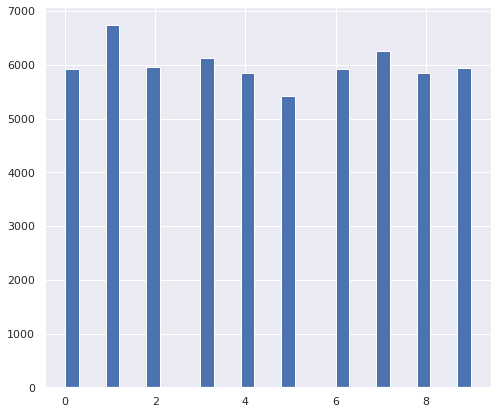

In [17]:
y_data.hist(figsize=(8,7), bins=30)

# 데이터분리

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_data,y_data, test_size=0.2, random_state=42)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

# scaling

In [20]:
#스케일링
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

x_train= std.fit_transform(x_train)
x_test=std.transform(x_test)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()

log_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
print('train score : {:.3f}'.format(log_model.score(x_train, y_train)))
print('test socre : {:.3f}'.format(log_model.score(x_test, y_test)))

train score : 0.945
test socre : 0.915


In [23]:
#y 예측값
y_pred_test=log_model.predict(x_test)

In [24]:
#rmse
from sklearn.metrics import mean_squared_error

mse= mean_squared_error(y_test,y_pred_test)
mse=np.sqrt(mse)
mse

1.1996527275285405

In [25]:
#gridsearch 사용
from sklearn.model_selection import GridSearchCV

log_model=LogisticRegression()

params = {'penalty':['5','l2', 'l1'],
         'C':[0.01]}

gs=GridSearchCV(log_model,
                param_grid=params,
                cv=3,
                scoring='accuracy',
                n_jobs=4,
                verbose=1
                )
gs.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    % (all_penalties, penalty)
ValueError: Lo

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.01], 'penalty': ['5', 'l2', 'l1']},
             scoring='accuracy', verbose=1)

In [26]:
log_best=gs.best_estimator_
print(log_best)

print(gs.best_score_)

LogisticRegression(C=0.01)
0.9193333333333333


In [27]:
acc_log_test=round(log_best.score(x_test,y_test)*100,2)
acc_log_test

92.44

In [38]:
print(len(log_best.predict(x_test)))

12000


# SVM

from sklearn.svm import LinearSVC

svm=LinearSVC()
svm.fit(x_train,y_train)

In [ ]:
print('train score : {:.3f}'.format(svm.score(x_train, y_train)))
print('test socre : {:.3f}'.format(svm.score(x_test, y_test)))

In [ ]:
svm_best=gs.best_estimator_
print(svm_best)

print(gs.best_score_)

In [ ]:
svm_best.fit(x_train,y_train)

#스코어
print('train score : {:.3f}'.format(svm_best.score(x_train, y_train)))
print('test socre : {:.3f}'.format(svm_best.score(x_test, y_test)))

In [ ]:
y_pred_test=svm_best.predict(x_test)

In [ ]:
#rmse
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred_test)
mse=np.sqrt(mse)
mse

In [ ]:
acc_svm_test=round(svm_best.score(x_test,y_test)*100,2)
acc_svm_test

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier( criterion='entropy',
                                max_depth=8,
                                random_state=41,
                                min_samples_leaf=7
                                )
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
print('train score : {:.3f}'.format(dt_model.score(x_train, y_train)))
print('test socre : {:.3f}'.format(dt_model.score(x_test, y_test)))

train score : 0.699
test socre : 0.693


In [ ]:
#grid search 사용해보기
from sklearn.model_selection import GridSearchCV

DTC = DecisionTreeClassifier(random_state=41, )

dtc_param_grid={'criterion':['gini','entropy'],
                'max_depth':[2,3,4,5,6,7,8,9],
                'min_samples_leaf':[1,2,3,4,5,7,9]
                }

gs=GridSearchCV(DTC,
                param_grid=dtc_param_grid,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=2
                )
gs.fit(x_train,y_train)

Fitting 2 folds for each of 112 candidates, totalling 224 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=41), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 9]},
             scoring='accuracy', verbose=2)

In [ ]:
#최적의 파라미터 조합 출력
dt_best=gs.best_estimator_
print(dt_best)

print(gs.best_score_)#최고 점수

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       random_state=41)
0.83775


In [ ]:
#스코어
print('train score : {:.3f}'.format(dt_best.score(x_train, y_train)))
print('test socre : {:.3f}'.format(dt_best.score(x_test, y_test)))

train score : 0.883
test socre : 0.851


In [ ]:
acc_dt_test=round(dt_best.score(x_test,y_test)*100,2)
acc_dt_test

85.1

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_model=RandomForestClassifier(100,
                                    max_depth=6,
                                    max_features=3)
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=3)

In [ ]:
print('train score : {:.3f}'.format(forest_model.score(x_train, y_train)))
print('test socre : {:.3f}'.format(forest_model.score(x_test, y_test)))

train score : 0.851
test socre : 0.843


In [ ]:
#grid search

rf=RandomForestClassifier(random_state=0,)

param={'n_estimators':[100,200,300,400],
       'max_features':[1,2,3],
       'max_depth':[1,2,3,4,5,6],
       }
gs=GridSearchCV(rf,
                param_grid=param,
                scoring='accuracy',
                cv=2,
                n_jobs=4,
                verbose=1
                )
gs.fit(x_train,y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [ ]:
#최적의 파라미터 조합 출력
rf_best=gs.best_estimator_
print(rf_best)

print(gs.best_score_)#최고 점수

RandomForestClassifier(max_depth=6, max_features=3, n_estimators=400,
                       random_state=0)
0.8539166666666667


In [ ]:
#스코어
print('train score : {:.3f}'.format(rf_best.score(x_train, y_train)))
print('test socre : {:.3f}'.format(rf_best.score(x_test, y_test)))

train score : 0.859
test socre : 0.853


In [ ]:
acc_rf_test=round(rf_best.score(x_test,y_test)*100,2)
acc_rf_test

85.3

# Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model=AdaBoostClassifier(n_estimators=9, learning_rate=0.5)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=9)

In [ ]:
print('train score : {:.3f}'.format(ada_model.score(x_train, y_train)))
print('test socre : {:.3f}'.format(ada_model.score(x_test, y_test)))

train score : 0.609
test socre : 0.604


In [ ]:
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=7)

ada_param_grid={'algorithm':['SAMME', 'SAMME.R'],
                'base_estimator__max_depth':[3,5,7,9],
                'learning_rate':[0.1, 0.3, 1.5,3.,10.],
                'n_estimators':[30,50,100]}
gs=GridSearchCV(ADA,
                param_grid=ada_param_grid,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=1)

gs.fit(x_train, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


In [ ]:
ada_best=gs.best_estimator_
print(ada_best)

print(gs.best_score_)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

kn_model=KNeighborsClassifier()

kn_model.fit(x_train,y_train)

print('train score : {:.3f}'.format(kn_model.score(x_train, y_train)))
print('test socre : {:.3f}'.format(kn_model.score(x_test, y_test)))

# 적용해보기

In [31]:
df

,index,label,px1,px2,px3,px4,px5,px6,px7,px8,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_test

,index,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
sample

,index,label
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
...,...,...
9995,9995,2
9996,9996,3
9997,9997,4
9998,9998,5


In [32]:
df_test.isnull().sum()

index    0
px1      0
px2      0
px3      0
px4      0
        ..
px780    0
px781    0
px782    0
px783    0
px784    0
Length: 785, dtype: int64

In [33]:
df_test_copy=df_test.drop('index', axis=1)
df_test_copy

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 전처리

In [34]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std=StandardScaler()

df_test_copy=std.fit_transform(df_test_copy)

In [36]:
pd.DataFrame(df_test_copy).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.557954e-17,1.350031e-17,4.973799e-18,-7.105427e-19,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.160103e-02,-2.852268e-02,-2.173659e-02,-1.000050e-02,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.160103e-02,-2.852268e-02,-2.173659e-02,-1.000050e-02,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.160103e-02,-2.852268e-02,-2.173659e-02,-1.000050e-02,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.160103e-02,-2.852268e-02,-2.173659e-02,-1.000050e-02,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.455881e+01,4.408052e+01,6.444419e+01,9.999500e+01,0.0,0.0,0.0,0.0,0.0,0.0


## test해보기

In [40]:
y_pred_test=log_best.predict(df_test_copy)
len(y_pred_test)

10000

In [42]:
y= pd.DataFrame(y_pred_test, columns=['label'])
y

,label
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [43]:
y['index']=df_test['index'].values
y

,label,index
0,7,0
1,2,1
2,1,2
3,0,3
4,4,4
...,...,...
9995,2,9995
9996,3,9996
9997,4,9997
9998,5,9998


In [44]:
y=y.reindex(['index','label'], axis=1)
y

,index,label
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
...,...,...
9995,9995,2
9996,9996,3
9997,9997,4
9998,9998,5


In [45]:
#csv파일로 저장
y.to_csv('./숫자 손 글씨 분류.csv', index=False)